<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /3_Group_5_Fold.xlsx')
data = data.iloc[:, 1:]
data

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,bad,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,bad,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,bad,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,good,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,bad,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,bad,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,good,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,bad,2


In [89]:
df0 = data.copy()

**NATNL**

In [90]:
data['NATNL'].value_counts()

0    52210
2      173
1      165
3       72
Name: NATNL, dtype: int64

In [91]:
data['NATNL'] = data['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})
data['NATNL'].value_counts()

Asian        52447
Non-Asian      173
Name: NATNL, dtype: int64

In [92]:
data['Group'].value_counts()

bad        34646
average     9768
good        8206
Name: Group, dtype: int64

**TimeDiff**

In [93]:
data = data.sort_values(['PatientUID', 'PatientVisitUID'])
data['TimeDiff'] = data.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data['TimeDiff'] = data['TimeDiff'].fillna(0)

In [94]:
data['time_t1'] = pd.to_datetime(data['time_t1'])

**encoder**

In [95]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data[column].unique())}
    data[column] = data[column].map(encoding_map)

**train test**

In [96]:
df = data.copy()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52620 entries, 1 to 52619
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   InPatient                     52620 non-null  int64         
 4   OutPatient                    52620 non-null  int64         
 5   Emergency                     52620 non-null  int64         
 6   time_t1                       52620 non-null  datetime64[ns]
 7   eGFR_t1                       52620 non-null  float64       
 8   VisitLocation                 52620 non-null  int64         
 9   StartDTTM                     52620 non-null  datetime64[ns]
 10  EndDttm                       52620 non-null  datetime64[ns]
 11  LabCwhen                    

In [97]:
df['Group'].value_counts()

0    34646
2     9768
1     8206
Name: Group, dtype: int64

In [98]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []  # List to store X_train_scaled for each fold
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42274, 72)
Test set size: (10346, 72)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 2:
Training set size : (42017, 72)
Test set size: (10603, 72)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Fold 3:
Training set size : (42027, 72)
Test set size: (10593, 72)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Fold 4:
Training set size : (41978, 72)
Test set size: (10642, 72)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 5:
Training set size : (42184, 72)
Test set size: (10436, 72)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---



In [99]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  # Add Dropout import
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping  # Correct import for EarlyStopping
import pandas as pd



```
If there are too many epochs, the model may **overfit**.
So, it is important to monitor the model’s performance on a validation set
during training and stop training when the validation performance starts to decay.
```



In [100]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(42184, 72)
(10436, 72)
(42184,)
(10436,)


> **Overfitting**
    
    Training Loss Continues to Decrease, but Validation Loss Increases

## **Some Features**

> **add dropout and EarlyStop**

In [101]:
def mean_absolute_percentage_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100.0

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

# Get the unique fold values
all_folds = data['Fold'].unique()

# Initialize lists to store metrics for each fold
loss_per_fold = []
all_train_loss = []
all_val_loss = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Define the model architecture
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(0.5))  # Add dropout layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout layer
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae', 'mape'])

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit data to model
    history = model.fit(X_train_scaled, y_train,
                        batch_size=32,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_test_scaled, y_test),
                        callbacks=[early_stopping])

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f'Score for fold {fold + 1}: {model.metrics_names[0]} = {scores[0]}; {model.metrics_names[1]} = {scores[1]}; {model.metrics_names[2]} = {scores[2]}')
    loss_per_fold.append(scores[0])

    # Store training and validation loss values for plotting
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Print average metrics across all folds
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'Mean Loss: {sum(loss_per_fold) / len(loss_per_fold)}')


Epoch 1/50
1322/1322 [==============================] - 6s 3ms/step - loss: 86.2071 - mae: 6.3197 - mape: 1782506.6250 - val_loss: 84.8347 - val_mae: 6.1819 - val_mape: 1543979.3750
Epoch 2/50
1322/1322 [==============================] - 4s 3ms/step - loss: 81.9532 - mae: 6.1851 - mape: 1514976.5000 - val_loss: 83.7849 - val_mae: 6.1520 - val_mape: 1521217.2500
Epoch 3/50
1322/1322 [==============================] - 6s 5ms/step - loss: 80.9911 - mae: 6.1450 - mape: 1933278.6250 - val_loss: 83.8635 - val_mae: 6.1576 - val_mape: 1259679.7500
Epoch 4/50
1322/1322 [==============================] - 4s 3ms/step - loss: 80.8045 - mae: 6.1623 - mape: 2340613.2500 - val_loss: 82.0688 - val_mae: 6.1029 - val_mape: 1693542.0000
Epoch 5/50
1322/1322 [==============================] - 4s 3ms/step - loss: 79.5382 - mae: 6.1268 - mape: 1572865.5000 - val_loss: 81.1376 - val_mae: 6.1207 - val_mape: 1773720.3750
Epoch 6/50
1322/1322 [==============================] - 5s 4ms/step - loss: 78.9093 - mae:

**adjust dropout**

    0.6 ➡ average loss 77.3 * last layer activation as linear
    ❌ 0.6 ➡ average loss 100 * last layer activation as relu
    0.5 ➡ average loss 77.01 * last layer activation as linear
    ✅ 0.3 ➡ average loss 76.7 * last layer activation as linear
    ❌ 0.1 ➡ average loss 100 * last layer activation as relu
    0.1 ➡ average loss 76.8 * last layer activation as linear


In [104]:
def mean_absolute_percentage_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100.0

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

# Get the unique fold values
all_folds = data['Fold'].unique()

# Initialize lists to store metrics for each fold
loss_per_fold = []
all_train_loss = []
all_val_loss = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Define the model architecture with dropout
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(0.3))  # Adjust dropout rate
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout rate
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae','mape'])

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit data to model with early stopping
    history = model.fit(X_train_scaled, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f'Score for fold {fold + 1}: {model.metrics_names[0]} = {scores[0]}; {model.metrics_names[1]} = {scores[1]}; {model.metrics_names[2]} = {scores[2]}')
    loss_per_fold.append(scores[0])

    # Store training and validation loss values for plotting
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Print average metrics across all folds
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'Mean Loss: {sum(loss_per_fold) / len(loss_per_fold)}')


Epoch 1/20
1322/1322 [==============================] - 9s 6ms/step - loss: 82.8398 - mae: 6.2114 - mape: 2092314.0000 - val_loss: 82.8474 - val_mae: 6.1535 - val_mape: 2499639.5000
Epoch 2/20
1322/1322 [==============================] - 9s 7ms/step - loss: 79.5294 - mae: 6.1099 - mape: 2020997.5000 - val_loss: 82.0481 - val_mae: 6.1626 - val_mape: 2543240.5000
Epoch 3/20
1322/1322 [==============================] - 8s 6ms/step - loss: 77.8112 - mae: 6.0759 - mape: 1996393.8750 - val_loss: 79.9772 - val_mae: 6.0905 - val_mape: 1951951.0000
Epoch 4/20
1322/1322 [==============================] - 4s 3ms/step - loss: 76.6226 - mae: 6.0350 - mape: 1893836.1250 - val_loss: 79.3811 - val_mae: 6.0716 - val_mape: 2246298.2500
Epoch 5/20
1322/1322 [==============================] - 4s 3ms/step - loss: 75.7635 - mae: 6.0278 - mape: 2199546.7500 - val_loss: 79.2186 - val_mae: 6.0645 - val_mape: 2325350.0000
Epoch 6/20
1322/1322 [==============================] - 3s 3ms/step - loss: 75.0230 - mae:

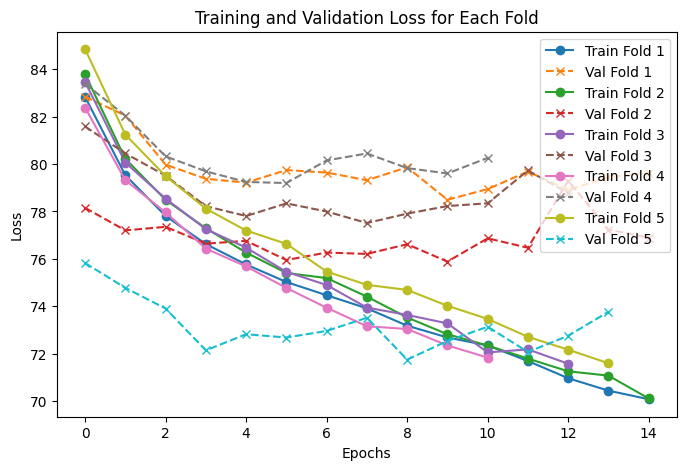

In [105]:
plt.figure(figsize=(8, 5))
for i in range(num_folds):
    plt.plot(all_train_loss[i], label=f'Train Fold {i + 1}', linestyle='-', marker='o')
    plt.plot(all_val_loss[i], label=f'Val Fold {i + 1}', linestyle='--', marker='x')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **All Features**

> **exclude datetime but include TimeDiff**
    

In [106]:
def mean_absolute_percentage_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100.0

X = data.drop(['Slopes','time_t1','StartDTTM','EndDttm','LabCwhen'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

# Get the unique fold values
all_folds = data['Fold'].unique()

# Initialize lists to store metrics for each fold
loss_per_fold = []
all_train_loss = []
all_val_loss = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Define the model architecture with dropout
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(0.3))  # Adjust dropout rate
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout rate
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae','mape'])

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit data to model with early stopping
    history = model.fit(X_train_scaled, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f'Score for fold {fold + 1}: {model.metrics_names[0]} = {scores[0]}; {model.metrics_names[1]} = {scores[1]}; {model.metrics_names[2]} = {scores[2]}')
    loss_per_fold.append(scores[0])

    # Store training and validation loss values for plotting
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Print average metrics across all folds
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'Mean Loss: {sum(loss_per_fold) / len(loss_per_fold)}')


Epoch 1/20
1319/1319 [==============================] - 6s 3ms/step - loss: 31.7620 - mae: 3.5162 - mape: 2776739.0000 - val_loss: 18.1259 - val_mae: 2.3969 - val_mape: 1086513.0000
Epoch 2/20
1319/1319 [==============================] - 4s 3ms/step - loss: 18.9514 - mae: 2.6140 - mape: 2372190.2500 - val_loss: 16.9030 - val_mae: 2.2944 - val_mape: 963036.7500
Epoch 3/20
1319/1319 [==============================] - 4s 3ms/step - loss: 17.0416 - mae: 2.4435 - mape: 2351275.5000 - val_loss: 13.1078 - val_mae: 2.0416 - val_mape: 938390.6250
Epoch 4/20
1319/1319 [==============================] - 5s 4ms/step - loss: 15.2116 - mae: 2.3274 - mape: 2182140.0000 - val_loss: 12.4901 - val_mae: 1.9873 - val_mape: 933898.5000
Epoch 5/20
1319/1319 [==============================] - 4s 3ms/step - loss: 14.2639 - mae: 2.2646 - mape: 2039350.8750 - val_loss: 12.0338 - val_mae: 1.9364 - val_mape: 914920.5625
Epoch 6/20
1319/1319 [==============================] - 4s 3ms/step - loss: 13.7008 - mae: 2.1

#### **plot**

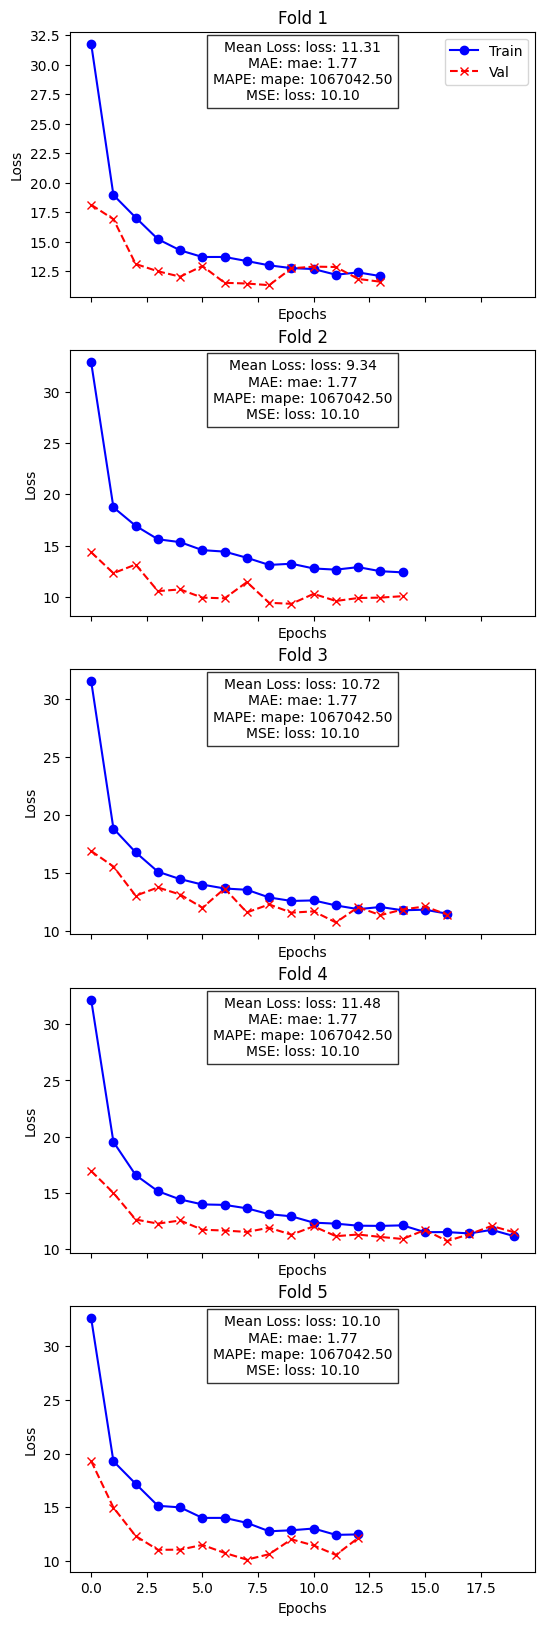

In [107]:
# Create subplots with 5 rows and 1 column
fig, axs = plt.subplots(num_folds, 1, figsize=(6, 4*num_folds), sharex=True)

# Loop over folds and plot on respective subplots
for i in range(num_folds):
    train_line, = axs[i].plot(all_train_loss[i], label='Train', linestyle='-', marker='o', color = 'blue')
    val_line, = axs[i].plot(all_val_loss[i], label='Val', linestyle='--', marker='x', color = 'red')

    axs[i].set_title(f'Fold {i + 1}')
    axs[i].set_ylabel('Loss')

    # Display the score information on the subplot
    axs[i].text(0.5, 0.85, f'Mean Loss: {model.metrics_names[0]}: {loss_per_fold[i]:.2f}\n'
                            f'MAE: {model.metrics_names[1]}: {scores[1]:.2f}\n'
                            f'MAPE: {model.metrics_names[2]}: {scores[2]:.2f}\n'
                            f'MSE: {model.metrics_names[0]}: {scores[0]:.2f}',
                horizontalalignment='center', verticalalignment='center',
                transform=axs[i].transAxes, bbox=dict(facecolor='white', alpha=0.8))

    axs[i].set_xlabel('Epochs')  # Set xlabel only for the last subplot

    # Display legend within the subplot
    if i == 0:
        axs[i].legend(handles=[train_line, val_line], loc='upper right')

plt.show()

## **Parameter**

**adjust batch_size**

    32 ➡ mean loss 10.42
    64 ➡ mean loss 10.40
    ✅ 128 ➡ mean loss 9.9

**add DropOut**

    ✅ dropout 1 layer ▶ 10.1
      dropout 2 layer ▶ 10.4
      dropout 3 layer ▶ 10.5

**BatchNormalization**

    batchnormal 1 layer ▶
    batchnormal 2 layer ▶ 9.9 but plot seems overfit
    batchnormal 3 layer ▶ 10.2

In [108]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [121]:
def mean_absolute_percentage_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100.0

X = data.drop(['Slopes','time_t1','StartDTTM','EndDttm','LabCwhen'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

# Get the unique fold values
all_folds = data['Fold'].unique()

# Initialize lists to store metrics for each fold
loss_per_fold = []
all_train_loss = []
all_val_loss = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Define the model architecture with dropout and L2 regularization
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae','mape'])

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit data to model with early stopping
    history = model.fit(X_train_scaled, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f'Score for fold {fold + 1}: {model.metrics_names[0]} = {scores[0]}; {model.metrics_names[1]} = {scores[1]}; {model.metrics_names[2]} = {scores[2]}')
    loss_per_fold.append(scores[0])

    # Store training and validation loss values for plotting
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Print average metrics across all folds
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'Mean Loss: {sum(loss_per_fold) / len(loss_per_fold)}')


Epoch 1/50
328/328 [==============================] - 4s 6ms/step - loss: 34.2261 - mae: 3.7548 - mape: 3218771.7500 - val_loss: 18.1775 - val_mae: 2.4671 - val_mape: 2674574.5000
Epoch 2/50
328/328 [==============================] - 4s 11ms/step - loss: 18.9124 - mae: 2.6579 - mape: 2138512.7500 - val_loss: 15.5582 - val_mae: 2.2644 - val_mape: 3127590.5000
Epoch 3/50
328/328 [==============================] - 2s 7ms/step - loss: 15.9895 - mae: 2.4356 - mape: 2317002.2500 - val_loss: 12.8144 - val_mae: 2.0061 - val_mape: 2605760.5000
Epoch 4/50
328/328 [==============================] - 2s 5ms/step - loss: 14.0204 - mae: 2.2664 - mape: 2154600.7500 - val_loss: 11.9525 - val_mae: 1.9326 - val_mape: 2701391.7500
Epoch 5/50
328/328 [==============================] - 2s 5ms/step - loss: 12.5467 - mae: 2.1474 - mape: 2243905.0000 - val_loss: 11.9298 - val_mae: 1.8968 - val_mape: 2188981.5000
Epoch 6/50
328/328 [==============================] - 2s 5ms/step - loss: 11.8261 - mae: 2.0745 - m

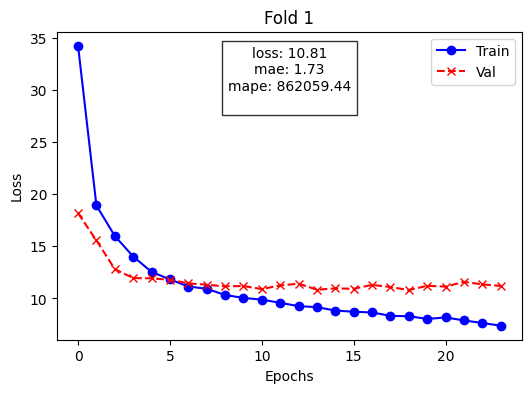

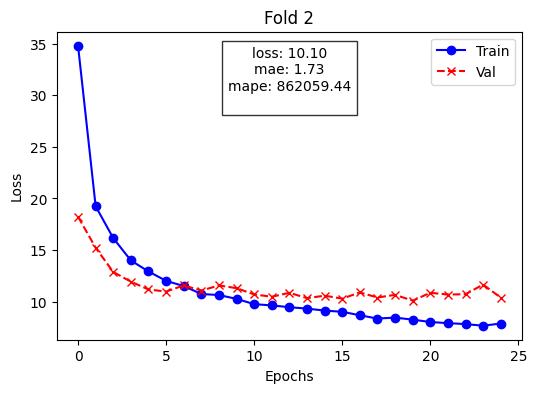

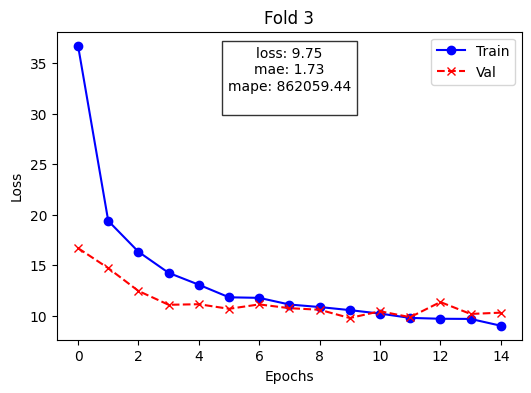

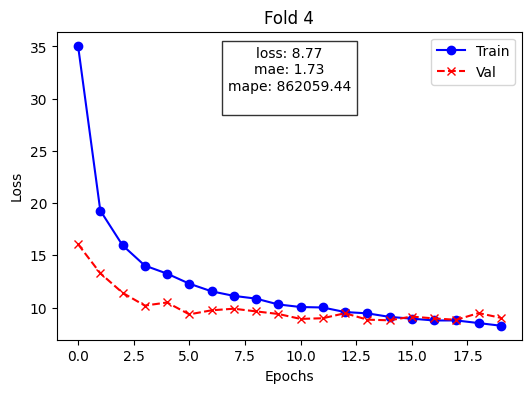

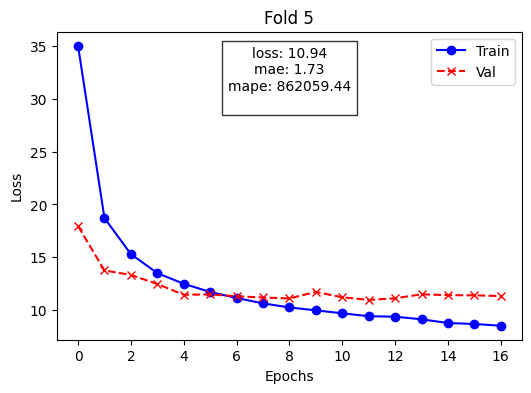

In [123]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(num_folds):
    plt.figure(figsize=(6, 4))
    train_line, = plt.plot(all_train_loss[i], label='Train', linestyle='-', marker='o', color='blue')
    val_line, = plt.plot(all_val_loss[i], label='Val', linestyle='--', marker='x', color='red')

    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.text(0.5, 0.85, f'{model.metrics_names[0]}: {loss_per_fold[i]:.2f}\n'
                        f'{model.metrics_names[1]}: {scores[1]:.2f}\n'
                        f'{model.metrics_names[2]}: {scores[2]:.2f}\n',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()


# 💻**The best model**

In [128]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation

In [129]:
def mean_absolute_percentage_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100.0

X = data.drop(['Slopes','time_t1','StartDTTM','EndDttm','LabCwhen'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

# Get the unique fold values
all_folds = data['Fold'].unique()

# Initialize lists to store metrics for each fold
loss_per_fold = []
all_train_loss = []
all_val_loss = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Define the model architecture with Batch Normalization and Dropout
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae','mape'])

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit data to model with early stopping
    history = model.fit(X_train_scaled, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f'Score for fold {fold + 1}: {model.metrics_names[0]} = {scores[0]}; {model.metrics_names[1]} = {scores[1]}; {model.metrics_names[2]} = {scores[2]}')
    loss_per_fold.append(scores[0])

    # Store training and validation loss values for plotting
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Print average metrics across all folds
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'Mean Loss: {sum(loss_per_fold) / len(loss_per_fold)}')


Epoch 1/50
331/331 [==============================] - 4s 7ms/step - loss: 40.8575 - mae: 4.0680 - mape: 2422111.0000 - val_loss: 16.3750 - val_mae: 2.3506 - val_mape: 2551182.0000
Epoch 2/50
331/331 [==============================] - 3s 10ms/step - loss: 21.7462 - mae: 2.8708 - mape: 2455888.7500 - val_loss: 13.7344 - val_mae: 2.0175 - val_mape: 1995203.5000
Epoch 3/50
331/331 [==============================] - 3s 8ms/step - loss: 19.0220 - mae: 2.6197 - mape: 2317203.7500 - val_loss: 12.5311 - val_mae: 1.9021 - val_mape: 2483771.5000
Epoch 4/50
331/331 [==============================] - 2s 7ms/step - loss: 17.1423 - mae: 2.4760 - mape: 2347475.0000 - val_loss: 11.7644 - val_mae: 1.8768 - val_mape: 2059766.0000
Epoch 5/50
331/331 [==============================] - 2s 6ms/step - loss: 16.3752 - mae: 2.4145 - mape: 2397011.5000 - val_loss: 10.9548 - val_mae: 1.8476 - val_mape: 2275173.0000
Epoch 6/50
331/331 [==============================] - 4s 11ms/step - loss: 15.3705 - mae: 2.3429 - 

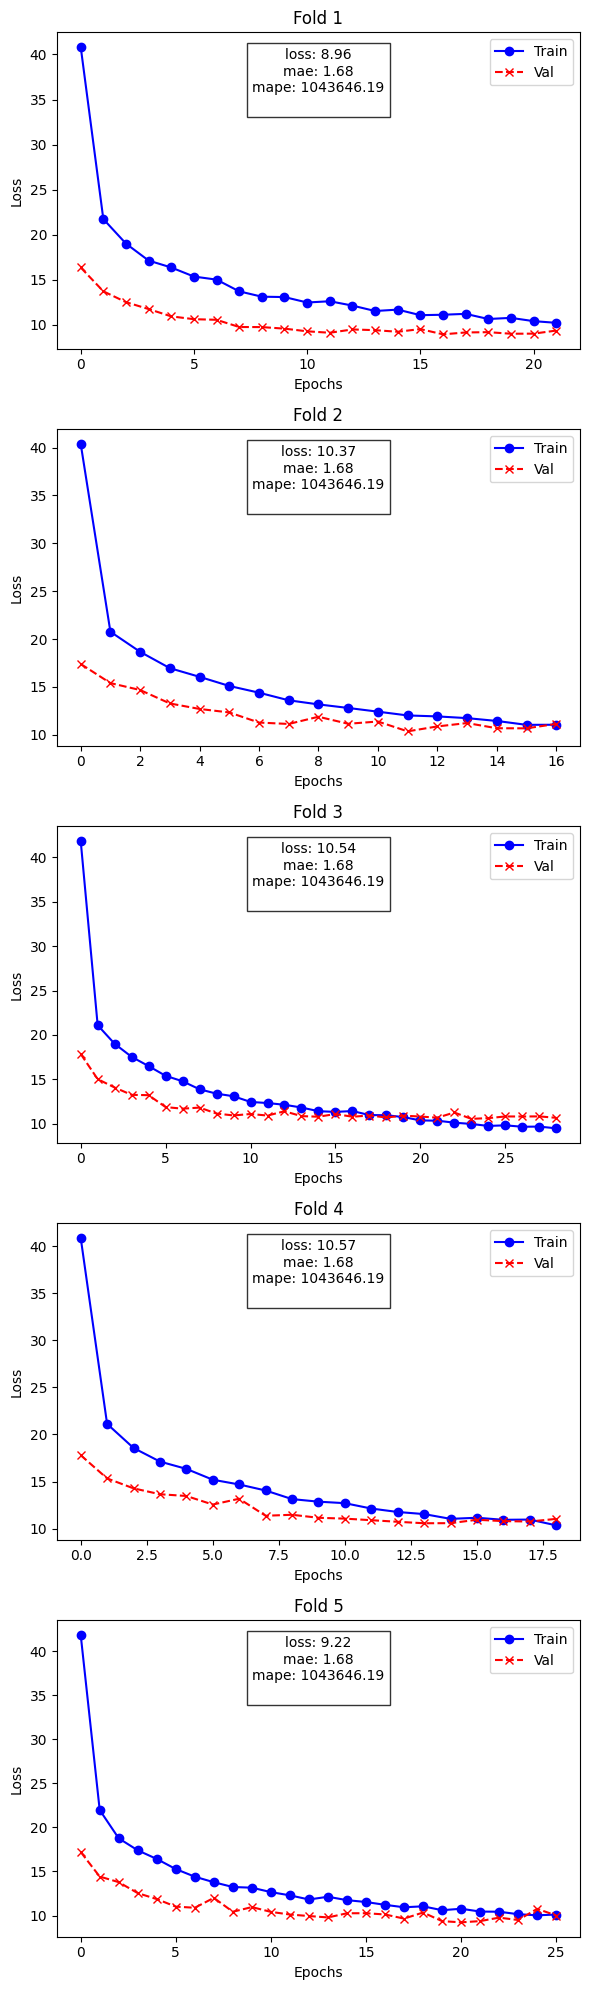

In [132]:
import matplotlib.pyplot as plt
import numpy as np

num_folds = len(all_train_loss)
fig, axs = plt.subplots(num_folds, 1, figsize=(6, 4 * num_folds))

for i in range(num_folds):
    train_line, = axs[i].plot(all_train_loss[i], label='Train', linestyle='-', marker='o', color='blue')

    val_line, = axs[i].plot(all_val_loss[i], label='Val', linestyle='--', marker='x', color='red')

    axs[i].set_title(f'Fold {i + 1}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].legend(loc='upper right')

    axs[i].text(0.5, 0.85, f'{model.metrics_names[0]}: {loss_per_fold[i]:.2f}\n'
                          f'{model.metrics_names[1]}: {scores[1]:.2f}\n'
                          f'{model.metrics_names[2]}: {scores[2]:.2f}\n',
                 horizontalalignment='center', verticalalignment='center',
                 transform=axs[i].transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


In [131]:
model.summary()

Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_659 (Dense)           (None, 256)               20736     
                                                                 
 batch_normalization_167 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_305 (Dropout)       (None, 256)               0         
                                                                 
 dense_660 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_168 (B  (None, 128)               512       
 atchNormalization)                                 